In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00


In [3]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle # để ghi file nhị phân
import nltk
from keras.layers import Dense, Embedding, LSTM, Dropout,SimpleRNN,LSTM,Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.models import model_from_json

In [5]:
data = pd.read_excel('/content/drive/MyDrive/AI_Advanced_CK/NLP/1_Chat/Data4.xlsx')

In [6]:
X = data["question"].tolist()
Y = data["answer"]
print("thuoc tinh dieu kien")
print(X)
print("thuoc tinh can du doan")
print(Y)

thuoc tinh dieu kien
['Tạm biệt bot', 'Goodbye', 'Tạm biệt mày nhé bot', 'Chào tạm biệt', 'Ngày mai gặp lại nhé bot', 'Adios', 'tạm biệt, tạm biệt, tạm biệt', 'see you again', 'Tạm biệt mày nhé', 'Xin chào tạm biệt anh bạn của tôi', 'Tạm biệt', 'Tao đi đây', 'goodbye, see you again', 'Xin chào bot nhé?', 'Hi?', 'Hola?', 'How are you?', 'What about you?', 'ní hảo', 'ní hảo ma', 'ní hảo ní hảo ní hảo', 'xin chào xin chào xin chào', 'hello, good morning, good afternoon', 'good morning', 'good afternoon', 'mày có biết tư vấn tuyển sinh không?', 'tư vấn, tư vấn và tư vấn', 'mày hãy tư vấn cho tao', 'hello bot, tư vấn tuyển sinh cho tao', 'xin chào', 'tư vấn, tư vấn, tư vấn', 'xin chào bot, tao là Tùng', 'xin chào bot, tao là ', 'Tao giới thiệu, giới thiệu, giới thiệu giới thiệu', 'good morning, good morning, good morning, good afternoon', 'tôi tên là, tao là, xin chào', 'hello mày', 'hi mày', 'hello bot', 'bot rất thông minh', 'mình cảm ơn sự giúp đỡ nhiệt thành của bot', 'bot quả là thật n

In [7]:
le = preprocessing.LabelEncoder()
le.fit(Y)
list_label = list(le.classes_)

print(list_label)
print(len(list_label))
label = le.transform(Y)
print('label')
label

['1 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '10 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '2 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '3 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '4 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '5 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '6 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '7 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '8 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '9 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', 'Chỉ tiêu xét tuyển ngành công nghệ thông tin: 390', 'Chỉ tiêu xét tuyển ngành khoa học máy tính: 120', 'Chỉ tiêu xét tuyển ngành kĩ thuật

array([66, 66, 66, ..., 68, 68, 68])

In [8]:
onehot_encoder = OneHotEncoder (sparse=False)
 # sparse=False trả về kết quả ở dạng ma trận
label = label.reshape(len(label), 1)
onehot_encoded = onehot_encoder.fit_transform(label)
print (onehot_encoded[0])
#onehot_encoded.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
def tienxuly(document):
  document = ViTokenizer.tokenize (document)
  # đưa về lower
  document = document.lower()
  # xóa các ký tự không cần thiết
  document = re.sub (r'[^\s\wáàảãạắằẳẵặấầẩẫậéèẻẽẹếềểễệóòỏõọốồổỗộớờởỡợíìỉĩịúùủũụứừửữựýỳỷỹỵđ_]',' ',document)
  # xóa khoảng trắng thừa
  document = re.sub (r'\s+', ' ', document).strip()
  return document

In [10]:
for i in range(0, len(X)):
  X[i]= tienxuly(X[i])
X[0:10]

['tạm_biệt bot',
 'goodbye',
 'tạm_biệt mày nhé bot',
 'chào tạm_biệt',
 'ngày_mai gặp lại nhé bot',
 'adios',
 'tạm_biệt tạm_biệt tạm_biệt',
 'see you again',
 'tạm_biệt mày nhé',
 'xin chào tạm_biệt anh bạn của tôi']

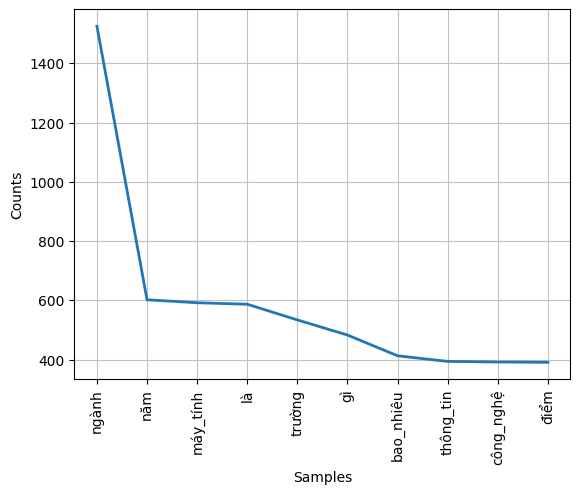

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
tokens = []
for i in range(0, len(X)):
  for j in X[i].split():
    tokens.append(j)
freq = nltk. FreqDist(tokens)
freq.plot(10, cumulative=False)

In [12]:
# https://viblo.asia/p/xu-ly-ngon-ngu-tu-nhien-voi-python-p7-awj53XA8K6m
# Stopwords hiểu đơn giản là các từ có tần số xuất hiện nhiều như the, to
stopwords_file = open("/content/drive/MyDrive/AI_Advanced_CK/NLP/1_Chat/stop_words_Vietnamese.txt", "r")
content = stopwords_file.read()
stopwords_VN = content.splitlines()
stopwords_file.close()
#print(stopwords_VN)
#stopword trong documents
stopword = ['nghành', 'ngành', 'trường']
stopwords = stopwords_VN + stopword
def remove_stopwords (line):
  words = []
  for word in line.strip().split():
    if word not in stopwords:
      words.append(word)
  return ' ' . join(words)

for i in range(0,len (X)):
  X[i]= remove_stopwords (X[i])

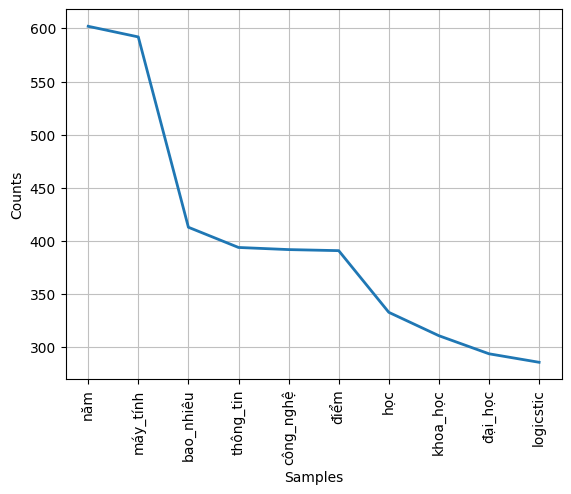

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
tokens = []
for i in range(0, len(X)):
  for j in X[i].split():
    tokens.append(j)
freq = nltk. FreqDist(tokens)
freq.plot(10, cumulative=False)

In [14]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts (X)
# text_to_sequence = tokenizer.texts_to_sequences (X)
# text_to_sequence

from pyvi.ViTokenizer import ViTokenizer
from collections import Counter

# Tokenize văn bản
tokenizer = ViTokenizer()
tokenized_texts = [tokenizer.tokenize(text) for text in X]

# Tạo từ điển (dictionary)
word_counts = Counter()
for text in tokenized_texts:
    for word in text.split():
        word_counts[word] += 1

word_counts = word_counts.most_common()
print(word_counts)
word_dict = {word: index + 1 for index, (word, _) in enumerate(word_counts)}
print(word_dict)
# Ánh xạ văn bản thành danh sách các chỉ số số nguyên
text_to_sequence = []
for text in tokenized_texts:
    sequence = []
    for word in text.split():
        if word in word_dict:
            sequence.append(word_dict[word])
    text_to_sequence.append(sequence)

print(text_to_sequence)


[('năm', 602), ('máy_tính', 592), ('bao_nhiêu', 413), ('thông_tin', 394), ('công_nghệ', 392), ('điểm', 391), ('học', 333), ('khoa_học', 311), ('đại_học', 294), ('logicstic', 286), ('kĩ_thuật', 282), ('đông_á', 255), ('đầu_vào', 255), ('điểm_chuẩn', 221), ('đào_tạo', 211), ('làm', 201), ('xét', 199), ('tuyển', 199), ('nào', 163), ('2022', 145), ('khmt', 141), ('ktpm', 134), ('httt', 133), ('tốt_nghiệp', 133), ('2020', 123), ('tôi', 122), ('2018', 118), ('2019', 111), ('cntt', 104), ('trong', 101), ('sinh_viên', 94), ('tín_chỉ', 93), ('công_việc', 92), ('khoa', 87), ('ở', 77), ('chỉ_tiêu', 72), ('trình_độ', 68), ('ngoại_ngữ', 68), ('thời_gian', 67), ('tổ_hợp', 67), ('trọ', 65), ('mấy', 64), ('ngôn_ngữ', 62), ('lập_trình', 62), ('tốt', 57), ('hình_thức', 56), ('tuyển_sinh', 55), ('bot', 53), ('điều_kiện', 53), ('đạt', 52), ('đồ_án', 52), ('đi', 46), ('đối_tượng', 44), ('lĩnh_vực', 44), ('toán', 44), ('giỏi', 43), ('giá', 40), ('quân_sự', 40), ('khối', 40), ('biết', 39), ('bao_lâu', 39), (

In [15]:
# Ví dụ qua 5 từ đầu tiên
for i in range(5):
  print("\nMã hóa từ thứ: ",i)
  print("Từ gốc : ",X[i] )
  print("Mã hóa thành các chuỗi số : ", text_to_sequence[i])


Mã hóa từ thứ:  0
Từ gốc :  tạm_biệt bot
Mã hóa thành các chuỗi số :  [113, 48]

Mã hóa từ thứ:  1
Từ gốc :  goodbye
Mã hóa thành các chuỗi số :  [198]

Mã hóa từ thứ:  2
Từ gốc :  tạm_biệt mày nhé bot
Mã hóa thành các chuỗi số :  [113, 78, 133, 48]

Mã hóa từ thứ:  3
Từ gốc :  chào tạm_biệt
Mã hóa thành các chuỗi số :  [105, 113]

Mã hóa từ thứ:  4
Từ gốc :  ngày_mai gặp nhé bot
Mã hóa thành các chuỗi số :  [234, 235, 133, 48]


In [16]:
#tìm chiều dài của chuỗi dài nhất
max_length_sequence = max([len(i) for i in text_to_sequence])
padded_zeros_sequence = pad_sequences (text_to_sequence, maxlen = max_length_sequence, padding= "pre")
# padding "pre" thêm 8 vào phía trước, Post thêm 9 vào phía sau của text_to_sequence
padded_zeros_sequence

array([[  0,   0,   0, ...,   0, 113,  48],
       [  0,   0,   0, ...,   0,   0, 198],
       [  0,   0,   0, ...,  78, 133,  48],
       ...,
       [  0,   0,   0, ..., 104,  93,   7],
       [  0,   0,   0, ...,  34,   5,   4],
       [  0,   0,   0, ...,  34,   5,   4]], dtype=int32)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_zeros_sequence, onehot_encoded, test_size=0.1, random_state=0)
#X_train. shape
X_test.shape
callback = tf.keras.callbacks. EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# TOT_SIZE = len(tokenizer.word_index)+1
TOT_SIZE = len(word_dict)+1

In [29]:
def RNN_model():
  model = Sequential()
  model.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))
  model.add(SimpleRNN(300))
  model.add(Dense (200, activation='relu'))
  model.add(Dense (99, activation='softmax')) #100 label
  return model

RNN_model = RNN_model()
RNN_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
RNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 13, 16)            4928      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 300)               95100     
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 99)                19899     
                                                                 
Total params: 180127 (703.62 KB)
Trainable params: 180127 (703.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
print(X_train.shape, Y_train.shape)

(1854, 13) (1854, 99)


In [26]:
history_RNN = RNN_model.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=16, callbacks=callback)

Epoch 1/50
93/93 [==============================] - 8s 37ms/step - loss: 4.4393 - accuracy: 0.0566 - val_loss: 4.3752 - val_accuracy: 0.0620
Epoch 2/50
93/93 [==============================] - 3s 33ms/step - loss: 4.0030 - accuracy: 0.1065 - val_loss: 3.6989 - val_accuracy: 0.0943
Epoch 3/50
93/93 [==============================] - 2s 18ms/step - loss: 3.2589 - accuracy: 0.1895 - val_loss: 3.1246 - val_accuracy: 0.1752
Epoch 4/50
93/93 [==============================] - 2s 24ms/step - loss: 2.5580 - accuracy: 0.3109 - val_loss: 2.4097 - val_accuracy: 0.3477
Epoch 5/50
93/93 [==============================] - 2s 26ms/step - loss: 1.8965 - accuracy: 0.4565 - val_loss: 1.8919 - val_accuracy: 0.4906
Epoch 6/50
93/93 [==============================] - 2s 17ms/step - loss: 1.3115 - accuracy: 0.6298 - val_loss: 1.3446 - val_accuracy: 0.6712
Epoch 7/50
93/93 [==============================] - 1s 15ms/step - loss: 0.8388 - accuracy: 0.7741 - val_loss: 1.2858 - val_accuracy: 0.7008
Epoch 8/50
93

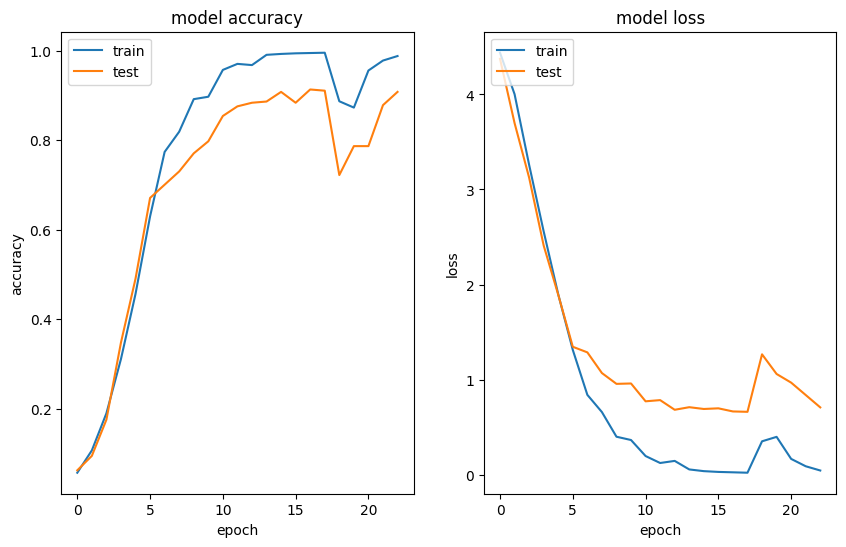

In [27]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# new_question = "Có những loại học phần nào"

# # Tiền xử lý câu hỏi mới
# new_question = tienxuly(new_question)
# new_question = remove_stopwords(new_question)

# # Chuyển câu hỏi thành vector
# new_sequence = tokenizer.texts_to_sequences([new_question])
# print(new_sequence)
# new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

# # Dự đoán câu trả lời
# prediction = RNN_model.predict(new_padded)

# # Giải mã nhãn
# predicted_label = le.inverse_transform([np.argmax(prediction)])
# print("Câu trả lời dự đoán:", predicted_label[0])

[[1, 29]]


In [30]:
def textsToSequences(text):
    sequence = []
    for word in text.split():
        if word in word_dict:
            sequence.append(word_dict[word])
    return sequence

In [33]:
new_question = "hello!"

# Tiền xử lý câu hỏi mới
new_question = tienxuly(new_question)
new_question = remove_stopwords(new_question)

# Chuyển câu hỏi thành vector
new_sequence = [textsToSequences(new_question)]
new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

# Dự đoán câu trả lời
prediction = RNN_model.predict(new_padded)

# Giải mã nhãn
predicted_label = le.inverse_transform([np.argmax(prediction)])
print("Câu trả lời dự đoán:", predicted_label[0])

1/1 [==============================] - 0s 45ms/step
Câu trả lời dự đoán: Điểm chuẩn ngành khoa học máy tính năm 2019: 16 điểm


In [ ]:
def Bidirectional_model():
  model = Sequential()
  model.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))
  model.add(Bidirectional (LSTM(500)))
  model.add(Dense (400, activation='relu'))
  model.add(Dense (300, activation='relu'))
  model.add(Dense (200, activation='relu'))
  model.add(Dense (100, activation='softmax'))
  return model

Bidirectional_model = Bidirectional_model()
Bidirectional_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
Bidirectional_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 13, 16)            5008      
                                                                 
 bidirectional_1 (Bidirecti  (None, 1000)              2068000   
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 400)               400400    
                                                                 
 dense_13 (Dense)            (None, 300)               120300    
                                                                 
 dense_14 (Dense)            (None, 200)               60200     
                                                                 
 dense_15 (Dense)            (None, 100)               20100     
                                                      

In [ ]:
history_Bidirectional = Bidirectional_model.fit(X_train, Y_train, epochs = 40, validation_split=0.2, batch_size=16, callbacks=callback)

Epoch 1/40
93/93 [==============================] - 29s 240ms/step - loss: 4.3490 - accuracy: 0.0464 - val_loss: 4.0884 - val_accuracy: 0.0538
Epoch 2/40
93/93 [==============================] - 17s 183ms/step - loss: 3.7567 - accuracy: 0.0767 - val_loss: 3.5449 - val_accuracy: 0.0780
Epoch 3/40
93/93 [==============================] - 17s 182ms/step - loss: 3.2406 - accuracy: 0.1366 - val_loss: 3.2330 - val_accuracy: 0.1667
Epoch 4/40
93/93 [==============================] - 18s 190ms/step - loss: 2.7621 - accuracy: 0.1952 - val_loss: 2.7183 - val_accuracy: 0.2043
Epoch 5/40
93/93 [==============================] - 18s 193ms/step - loss: 2.4010 - accuracy: 0.2712 - val_loss: 2.5673 - val_accuracy: 0.2339
Epoch 6/40
93/93 [==============================] - 18s 192ms/step - loss: 2.1207 - accuracy: 0.3136 - val_loss: 2.1593 - val_accuracy: 0.3817
Epoch 7/40
93/93 [==============================] - 19s 209ms/step - loss: 1.8982 - accuracy: 0.3816 - val_loss: 1.9659 - val_accuracy: 0.4382

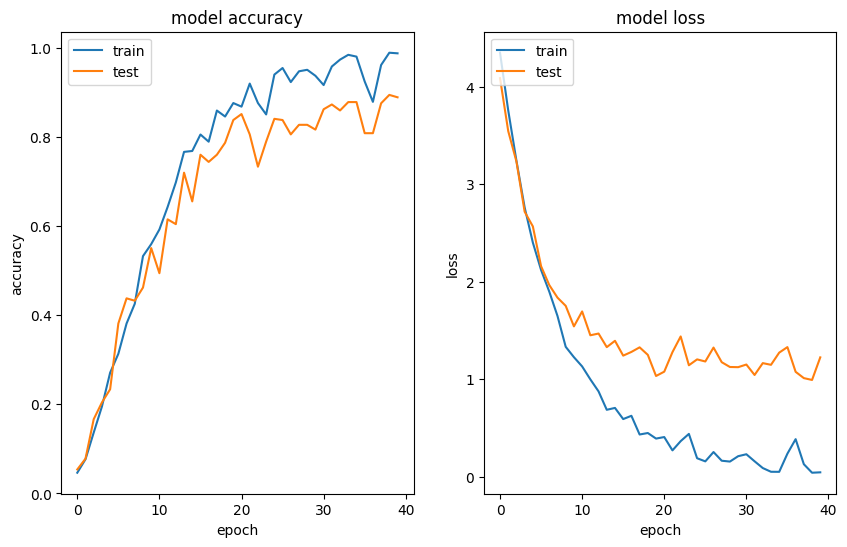

In [ ]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_Bidirectional.history['accuracy'])
plt.plot(history_Bidirectional.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_Bidirectional.history['loss'])
plt.plot(history_Bidirectional.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
new_question = "Nguyễn Công Cường là ai ?"

# Tiền xử lý câu hỏi mới
new_question = tienxuly(new_question)
new_question = remove_stopwords(new_question)

# Chuyển câu hỏi thành vector
# new_sequence = tokenizer.texts_to_sequences([new_question])
new_sequence = [textsToSequences(new_question)]
new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

# Dự đoán câu trả lời
prediction = Bidirectional_model.predict(new_padded)

predicted_label = le.inverse_transform([np.argmax(prediction)])
print("Câu trả lời dự đoán:", predicted_label[0])

1/1 [==============================] - 0s 108ms/step
Câu trả lời dự đoán: Có Nguyễn Công Cường đang là sinh viên năm 4 học chuyên ngành công nghệ thông tin lớp 20T1


In [ ]:
#@title embedings
new_question = "Nguyễn Công Cường là ai ?"

# Tiền xử lý câu hỏi mới
new_question = tienxuly(new_question)
new_question = remove_stopwords(new_question)

# Chuyển câu hỏi thành vector
# new_sequence = tokenizer.texts_to_sequences([new_question])
new_sequence = [textsToSequences(new_question)]
new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

modelx = Sequential()
modelx.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))

# Lấy embedding của chuỗi
embeddings = modelx.predict(new_padded)
print("Embeddings:", embeddings)

1/1 [==============================] - 0s 147ms/step
Embeddings: [[[-3.11288834e-02  4.98544425e-04 -2.51351483e-02  2.00061835e-02
   -2.20130216e-02 -4.01936471e-04 -1.44021623e-02 -3.60395201e-02
    4.14001979e-02 -5.03367186e-03  3.00318636e-02 -1.24405399e-02
    9.41639021e-03  3.39940898e-02  4.51026075e-02 -1.68911815e-02]
  [-3.11288834e-02  4.98544425e-04 -2.51351483e-02  2.00061835e-02
   -2.20130216e-02 -4.01936471e-04 -1.44021623e-02 -3.60395201e-02
    4.14001979e-02 -5.03367186e-03  3.00318636e-02 -1.24405399e-02
    9.41639021e-03  3.39940898e-02  4.51026075e-02 -1.68911815e-02]
  [-3.11288834e-02  4.98544425e-04 -2.51351483e-02  2.00061835e-02
   -2.20130216e-02 -4.01936471e-04 -1.44021623e-02 -3.60395201e-02
    4.14001979e-02 -5.03367186e-03  3.00318636e-02 -1.24405399e-02
    9.41639021e-03  3.39940898e-02  4.51026075e-02 -1.68911815e-02]
  [-3.11288834e-02  4.98544425e-04 -2.51351483e-02  2.00061835e-02
   -2.20130216e-02 -4.01936471e-04 -1.44021623e-02 -3.6039520

NameError: name 'sequences' is not defined

In [ ]:
# Chuyển đổi từ thành chỉ số
word = "ai"
try:
  word_index_in_vocab = word_dict[word]

  print(f"Chỉ số của từ '{word}':", word_index_in_vocab)  # Chỉ số của từ 'thích': 4

  # Tạo chuỗi chứa chỉ số của từ (dạng mảng 2D để phù hợp với yêu cầu của mô hình)
  word_sequence = np.array([[word_index_in_vocab]])
  print("Chuỗi chứa chỉ số của từ:", word_sequence)

  # Tính toán embedding cho từ
  embedding_of_word = modelx.predict(word_sequence)
  print(f"Embedding của từ '{word}':", embedding_of_word)

except:
  print("tu nay ko co trong tu dien")

Chỉ số của từ 'ai': 102
Chuỗi chứa chỉ số của từ: [[102]]
1/1 [==============================] - 0s 36ms/step
Embedding của từ 'ai': [[[ 0.03644681 -0.02364022  0.04151     0.01136875 -0.01387825
   -0.0448491  -0.03617674  0.00873995  0.0452573   0.02836746
    0.02870599  0.03559833  0.00795238  0.00249635 -0.02614223
   -0.0189032 ]]]
